# 関数 save_fig：図の保存用

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return
    
    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0)

# 実習1.1：文字列を表示する

In [16]:
print('ColabでPythonを実行します')

ColabでPythonを実行します


# 実習1.2：変数を使って演算する

In [17]:
a=10 #整数型の変数aを値10で初期化
b=2  #整数型の変数bを値2で初期化
print(a+b)

c=10.0 #浮動小数点型の変数cを値10.0で初期化
d=2    #整数型の変数dを値2で初期化
print(c+d)

12
12.0


# 実習1.3：変数を使って演算する 2

In [18]:
a=10 #整数型の変数aを値10で初期化
b=2  #整数型の変数bを値2で初期化

print('a / b =',a/b)
print('a // b =',a//b)

a / b = 5.0
a // b = 5


# 実習1.4：文字列と数値を結合して表示する

In [28]:
a=10 #整数型の変数aを値10で初期化
b=2  #整数型の変数bを値2で初期化

print(str(a) + ' + ' + str(b) + ' = ' + str(a + b))
print(f'{a} + {b} = {a + b}')

10 + 2 = 12
10 + 2 = 12


# 実習1.5：リストを使う

In [29]:
#文字列を要素にもつリストを作成
names=['りんご','みかん','バナナ']

print('要素数　=',len(names))
print(names[0])
print(names[1])
print(names[2])

要素数　= 3
りんご
みかん
バナナ


# 実習1.6：リストからNumPy配列を作る

In [30]:
import numpy as np #numpyモジュールを別名npで読み込む

#整数を要素にもつリストを作成
num=[1,2,3,9,5,4]

#numpyのarray関数にリストを渡して配列を生成
a=np.array(num)

print('要素数　=',len(a))
print(a) #配列全体を表示
print(a[0]) #インデックス0の値を参照
print(a[5]) #インデックス5の値を参照

要素数　= 6
[1 2 3 9 5 4]
1
4


# 実習1.7：NumPy配列から最大値とそのインデックスを取得する

In [15]:
num=[1,2,3,9,5,4]

a=np.array(num)

max_value=a.max() #最大値を取得
max_index=a.argmax() #最大値のあるインデックスを取得

print(f'最大数は{max_value}です。')
print(f'インデックスは{max_index}です。')

最大数は9です。
インデックスは3です。


# 実習1.8：学習済みのニューラルネットワークをファイルから読み込む

In [19]:
#JSON形式からニューラルネットワークのモデルを生成するための関数をロード
from tensorflow.keras.models import model_from_json

#ニューラルネットワークの構造が書かれたファイルを開く
#open(ファイルパス，モード)。'r'は読み取り専用でファイルを開く指示
file=open('model.json','r')

#ファイルを読み込む。ファイルはJSON形式
#ファイルの内容からニューラルネットワークのモデルを生成
model=model_from_json(file.read())

#モデルのパラメータを読み込む
model.load_weights('model.h5')

#モデルを構造を表示する
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

# 実習1.9：数字を手書きする

In [24]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>終了</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

// 背景を黒で塗りつぶす
ctx.filleStyle = '#000000';
ctx.fillRect(0, 0, canvas.width, canvas.height)

// 描画する線の幅と色
ctx.lineWidth = %d
ctx.strokeStyle = '#ffffff';

var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=256, h=256, line_width=16):
    display(HTML(canvas_html % (w, h, line_width)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    
draw()

# 実習1.10：手書き数字の画像を扱う

画像の高さ　= 256
画像の幅　= 256
画像をリサイズ
画像の高さ　= 28
画像の幅　= 28


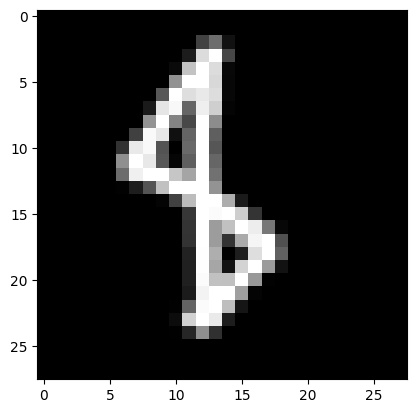

In [25]:
import numpy as np
#PILモジュールから画像を扱うためのクラスImageをロード
from PIL import Image

#画像を表示するモジュールmatplot.pyplotを別名pltとしてロード
import matplotlib.pyplot as plt

image=Image.open('drawing.png') #画像を読み込む
image=image.convert('L') #グレースケール画像に変換
print('画像の高さ　=',image.height)
print('画像の幅　=',image.width)

print('画像をリサイズ')
#image.resize(幅，高さ):画像を引数で渡した幅と高さにリサイズする
image=image.resize((28,28))
print('画像の高さ　=',image.height)
print('画像の幅　=',image.width)

#画像を表示する
plt.imshow(image,cmap='gray')
plt.show()

# 実習1.11：画像からNumPy配列を生成する

In [26]:
#画像をNumpyのarray関数に渡して配列を生成
image_array=np.array(image)

#配列のインスタンスimage_arrayの属性shapeを参照して、配列の形状を取得
print('配列の形状　=',image_array.shape)
h=image_array.shape[0]
w=image_array.shape[1]
print('画像の高さ　=',h)
print('画像の幅　=',w)

配列の形状　= (28, 28)
画像の高さ　= 28
画像の幅　= 28


# 実習1.12：学習済みモデルで書かれた数字を推論する

In [27]:
#ニューラルネットワークへの入力用に配列の形状を変更する。
#画像を4次元配列（4階のテンソル）にするのは、TensorFlowの掟。
image_array=image_array.reshape((1,h,w,1))
print('配列の形状=',image_array.shape)

#ネットワークモデルに画像から生成した配列を入力し、書かれた数字を推論。
#0から9の10種類の数字それぞれについての確率が2次元配列として返される。
pred=model.predict(image_array)

print('予測確率',pred[0])

print('あなたの描いた数字は',pred[0].argmax(),'です')

配列の形状= (1, 28, 28, 1)
1/1 [==============================] - 0s 34ms/step
予測確率 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
あなたの描いた数字は 8 です
